# Sales Performance & Customer Segmentation (RFM) Analysis

## Project Overview
This project analyzes sales performance and customer purchasing behavior using transactional data.
The goal is to extract business insights and segment customers using RFM analysis to support strategic decision-making.

## Business Objective

The objective of this project is to analyze sales performance and customer behavior using transactional data.

This analysis aims to:
- Evaluate overall revenue and profitability
- Identify top-performing product categories
- Analyze regional sales trends
- Segment customers using RFM analysis
- Provide business recommendations

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Dataset

df = pd.read_csv("../01_data/superstore_raw.csv", encoding="latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Cleaning & Preparation

Objective:
Ensure the dataset is clean, consistent, and ready for analysis.

In [3]:
#Converting Datatype of Order date & Ship Date to datetime

df["Order Date"] = pd.to_datetime(df["Order Date"], format="mixed", errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="mixed", errors="coerce")

df.info()

df["Order Date"].isna().sum()
df["Ship Date"].isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

np.int64(0)

In [4]:
#Cheacking Duplicates
df.duplicated().sum()

np.int64(0)

### Insight
- Dataset contains 9,994 records.
- No duplicate rows were found.
- Date columns were converted to proper datetime format.

In [5]:
#Feature Engineering

df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Profit Margin'] = df['Profit'] / df['Sales']
df["Order Day"] = df["Order Date"].dt.day
df["Order Month Name"] = df["Order Date"].dt.month_name()

#df = df.drop(["Year", "Month"], axis=1)
df.head()

df['Profit Margin'] = np.where(
    df['Sales'] != 0,
    df['Profit'] / df['Sales'],
    0
)

df[['Sales','Profit','Profit Margin']].describe()

,Sales,Profit,Profit Margin
count,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,0.120314
std,623.245101,234.260108,0.466754
min,0.444000,-6599.978000,-2.750000
25%,17.280000,1.728750,0.075000
50%,54.490000,8.666500,0.270000
75%,209.940000,29.364000,0.362500
max,22638.480000,8399.976000,0.500000


### Insight:

Additional time-based and profitability features were created to enable trend analysis and margin evaluation.

In [6]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_profit_margin = df['Profit Margin'].mean()

total_sales, total_profit, avg_profit_margin

#The company generated approximately 2.3M in revenue with a 12% average profit margin. However,
#the presence of large negative margins suggests potential pricing or discount inefficiencies in certain categories.


(np.float64(2297200.8603),
 np.float64(286397.0217),
 np.float64(0.12031392972104457))

In [7]:
#Year-wise Sales & Profit Output

df.groupby("Order Year")[["Sales", "Profit"]].sum()


,Sales,Profit
Order Year,,
2014,484247.4981,49543.9741
2015,470532.5090,61618.6037
2016,609205.5980,81795.1743
2017,733215.2552,93439.2696


###  Year-wise Sales & Profit Insight

The company shows an overall upward growth trend from 2014 to 2017.

- Sales increased significantly from $484K in 2014 to $733K in 2017.
- Profit consistently increased every year, reaching $93K in 2017.
- Despite a slight dip in sales in 2015, profit increased, indicating improved cost management and operational efficiency.

Overall, the business demonstrates strong and consistent growth performance.

In [8]:
#Calculate Year-over-Year Growth
yearly_sales = df.groupby('Order Year')[['Sales','Profit']].sum()

yearly_growth = yearly_sales.pct_change() * 100
yearly_growth = yearly_growth.round(2)

yearly_growth


,Sales,Profit
Order Year,,
2014,NaN,NaN
2015,-2.83,24.37
2016,29.47,32.74
2017,20.36,14.24


In [9]:
#Calculate Total Growth

sales_growth = ((yearly_sales.loc[2017, 'Sales'] - yearly_sales.loc[2014, 'Sales']) 
                / yearly_sales.loc[2014, 'Sales']) * 100

profit_growth = ((yearly_sales.loc[2017, 'Profit'] - yearly_sales.loc[2014, 'Profit']) 
                 / yearly_sales.loc[2014, 'Profit']) * 100

sales_growth, profit_growth


(np.float64(51.41332853073134), np.float64(88.59865664268544))

### Overall Growth Analysis (2014–2017)

- Sales increased by 51.41% over the four-year period.
- Profit increased by 88.60% during the same period.

The profit growth rate is significantly higher than the sales growth rate, 
indicating improved operational efficiency and better cost management.

This suggests that the company is not only expanding revenue but also optimizing profitability.

In [10]:
#Monthly Sales Trend Analysis

monthly_sales = df.groupby(['Order Month','Order Month Name'])[['Sales','Profit']].sum().reset_index()

monthly_sales = monthly_sales.sort_values('Order Month')

monthly_sales

,Order Month,Order Month Name,Sales,Profit
0,1,January,94924.8356,9134.4461
1,2,February,59751.2514,10294.6107
2,3,March,205005.4888,28594.6872
3,4,April,137762.1286,11587.4363
4,5,May,155028.8117,22411.3078
5,6,June,152718.6793,21285.7954
6,7,July,147238.0970,13832.6648
7,8,August,159044.0630,21776.9384
8,9,September,307649.9457,36857.4753
9,10,October,200322.9847,31784.0413


### Monthly Sales Trend Insight

The business shows strong seasonal patterns throughout the year.

- November recorded the highest sales ($352K).
- December generated the highest profit ($43K), indicating better profit margins.
- September–December (Q4) shows significant revenue growth.
- February recorded the lowest sales ($59K), indicating a seasonal slowdown.

The strong Q4 performance suggests that holiday demand significantly impacts revenue.
Strategic marketing campaigns during high-performing months can further maximize profitability.

## Category Performance Analysis
Objective:
Analyze sales and profitability across product categories 
to identify high-performing and underperforming segments.

In [11]:
category_analysis = df.groupby('Category')[['Sales','Profit']].sum().reset_index()

category_analysis['Profit Margin'] = (category_analysis['Profit'] / category_analysis['Sales']) * 100

category_analysis = category_analysis.round(2)

category_analysis 


,Category,Sales,Profit,Profit Margin
0,Furniture,741999.80,18451.27,2.49
1,Office Supplies,719047.03,122490.80,17.04
2,Technology,836154.03,145454.95,17.40


### Category Insight
Technology is the top-performing category with the highest sales and profit, 
and a strong profit margin (~17%).

Office Supplies is also profitable with a similar margin.

Furniture has high sales but very low profit (2.49% margin), 
which indicates low profitability and needs attention.

## Sub-Category Analysis
Objective:
Analyze sales and profit at sub-category level 
to identify high-performing and loss-making products.

In [12]:
sub_category_analysis = df.groupby(['Category','Sub-Category'])[['Sales','Profit']].sum().reset_index()

sub_category_analysis['Profit Margin'] = (sub_category_analysis['Profit'] / sub_category_analysis['Sales']) * 100

sub_category_analysis = sub_category_analysis.round(2)

sub_category_analysis.sort_values('Profit').reset_index(drop=True)



,Category,Sub-Category,Sales,Profit,Profit Margin
0,Furniture,Tables,206965.53,-17725.48,-8.56
1,Furniture,Bookcases,114880.00,-3472.56,-3.02
2,Office Supplies,Supplies,46673.54,-1189.10,-2.55
3,Office Supplies,Fasteners,3024.28,949.52,31.40
4,Technology,Machines,189238.63,3384.76,1.79
5,Office Supplies,Labels,12486.31,5546.25,44.42
6,Office Supplies,Art,27118.79,6527.79,24.07
7,Office Supplies,Envelopes,16476.40,6964.18,42.27
8,Furniture,Furnishings,91705.16,13059.14,14.24
9,Office Supplies,Appliances,107532.16,18138.01,16.87


### Sub-Category Insight
Tables and Bookcases are loss-making products within the Furniture category, 
which is the main reason for Furniture’s low overall profit margin.

Tables alone show a significant negative profit.

On the other hand, Copiers, Paper, and Labels have very high profit margins 
and are the most profitable sub-categories.

## Regional Analysis
Objective:
Analyze sales and profit across regions 
to identify high and low performing areas.

In [13]:
region_analysis = df.groupby('Region')[['Sales','Profit']].sum().reset_index()

region_analysis['Profit Margin'] = (region_analysis['Profit'] / region_analysis['Sales']) * 100

region_analysis = region_analysis.round(2)

region_analysis.sort_values('Profit').reset_index(drop=True)


,Region,Sales,Profit,Profit Margin
0,Central,501239.89,39706.36,7.92
1,South,391721.90,46749.43,11.93
2,East,678781.24,91522.78,13.48
3,West,725457.82,108418.45,14.94


### Regional Insight
West is the top-performing region with the highest sales and profit, 
followed by East.

Central has the lowest profit margin (7.92%), 
indicating weaker profitability compared to other regions.

Improving performance in the Central region could increase overall profit.

## Customer Segmentation using RFM Analysis
Objective:
Segment customers based on their purchasing behavior 
using Recency, Frequency, and Monetary metrics 
to identify high-value and at-risk customers.

In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

reference_date = df['Order Date'].max() + pd.Timedelta(days=1)

reference_date

Timestamp('2017-12-31 00:00:00')

In [15]:
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (reference_date - x.max()).days,
    'Customer ID': 'count',
    'Sales': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,185,11,5563.560
AA-10375,20,15,1056.390
AA-10480,260,12,1790.512
AA-10645,56,18,5086.935
AB-10015,416,6,886.156


In [16]:
# Recency score (lower recency = better)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])

# Frequency score (higher frequency = better)
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1,2,3,4])

# Monetary score (higher spending = better)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
Customer ID,,,,,,
AA-10315,185,11,5563.560,1,2,4
AA-10375,20,15,1056.390,4,3,1
AA-10480,260,12,1790.512,1,2,2
AA-10645,56,18,5086.935,3,4,4
AB-10015,416,6,886.156,1,1,1


In [17]:
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + \
                   rfm['F_Score'].astype(str) + \
                   rfm['M_Score'].astype(str)

rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
Customer ID,,,,,,,
AA-10315,185,11,5563.560,1,2,4,124
AA-10375,20,15,1056.390,4,3,1,431
AA-10480,260,12,1790.512,1,2,2,122
AA-10645,56,18,5086.935,3,4,4,344
AB-10015,416,6,886.156,1,1,1,111


In [18]:
def segment_customer(row):
    if row['RFM_Score'] == '444':
        return 'VIP Customer'
    elif row['R_Score'] == 4:
        return 'Loyal Customer'
    elif row['R_Score'] == 1:
        return 'At Risk'
    else:
        return 'Regular'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

rfm['Segment'].value_counts()

Segment
Regular           394
At Risk           196
Loyal Customer    174
VIP Customer       29
Name: count, dtype: int64

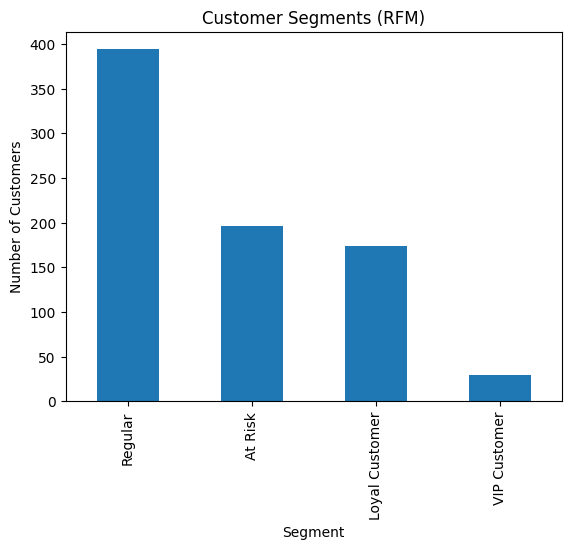

In [19]:
segment_counts = rfm['Segment'].value_counts()

plt.figure()
segment_counts.plot(kind='bar')
plt.title('Customer Segments (RFM)')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

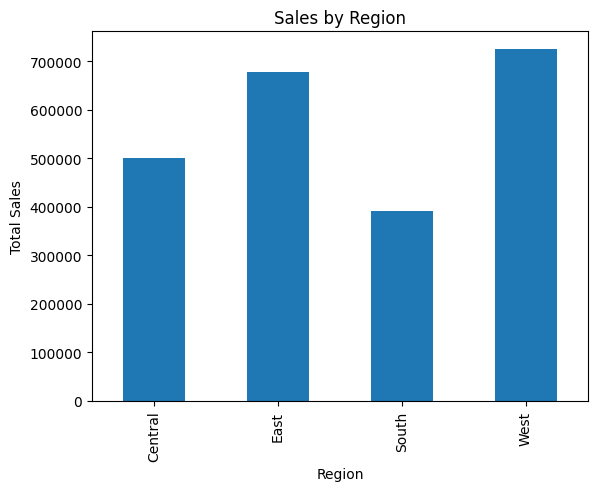

In [20]:
import matplotlib.pyplot as plt

region_sales = df.groupby('Region')['Sales'].sum()

plt.figure()
region_sales.plot(kind='bar')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

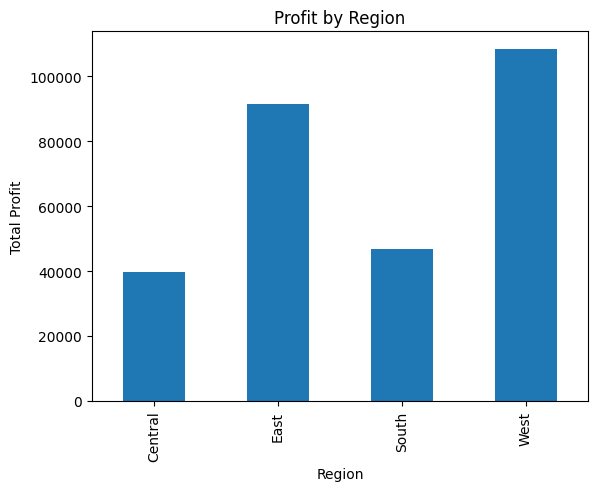

In [21]:
region_profit = df.groupby('Region')['Profit'].sum()

plt.figure()
region_profit.plot(kind='bar')
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

## Final Conclusion
1. Sales increased consistently from 2015 to 2017.
2. West region generated highest sales and profit.
3. Technology category has the highest profit margin.
4. Furniture (especially Tables) is causing losses.
5. Most customers are Regular, but VIP customers contribute high revenue.
6. Some customers are At Risk and need retention strategy.

Overall, the company is growing steadily, but needs to improve performance in loss-making categories
and focus on customer retention strategies.